In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../results/temp/behaviours_changes.csv')

In [3]:
df.columns

Index(['ResponseId', 'MODZCTA', 'mask_march2020', 'mask_spring2020',
       'mask_summer2020', 'mask_fall2020', 'mask_winter2020',
       'indoor_march2020', 'indoor_spring2020', 'indoor_summer2020',
       'indoor_fall2020', 'indoor_winter2020', 'mask_march2020_num',
       'mask_spring2020_num', 'mask_summer2020_num', 'mask_fall2020_num',
       'mask_winter2020_num', 'mask_march2020_num_avg',
       'mask_spring2020_num_avg', 'mask_summer2020_num_avg',
       'mask_fall2020_num_avg', 'mask_winter2020_num_avg', 'averages', 'color',
       'mask_averages', 'mask_color', 'indoor_march2020_num',
       'indoor_spring2020_num', 'indoor_summer2020_num', 'indoor_fall2020_num',
       'indoor_winter2020_num', 'indoor_march2020_num_avg',
       'indoor_spring2020_num_avg', 'indoor_summer2020_num_avg',
       'indoor_fall2020_num_avg', 'indoor_winter2020_num_avg',
       'indoor_averages', 'indoor_color'],
      dtype='object')

In [4]:
import time
import warnings
from itertools import cycle, islice

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [21]:
ids = df['ResponseId']
pattern_col = ['mask_march2020_num_avg',
       'mask_spring2020_num_avg', 'mask_summer2020_num_avg',
       'mask_fall2020_num_avg', 'mask_winter2020_num_avg','indoor_march2020_num_avg',
       'indoor_spring2020_num_avg', 'indoor_summer2020_num_avg',
       'indoor_fall2020_num_avg', 'indoor_winter2020_num_avg']
data_to_scale = df[pattern_col]
# Apply scaling to the data without the ID
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_to_scale)

In [22]:
# Apply DBSCAN
# dbscan = DBSCAN(eps=0.1, min_samples=5)
# dbscan.fit(data_scaled)

# # Get the cluster labels
# cluster_labels = dbscan.labels_
# #### in one clusters too many points

#Apply K-Means
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(data_scaled)
cluster_labels = kmeans.labels_
df['k_means_cluster'] = cluster_labels
# df.to_csv('../results/temp/behaviours_changes_clusters.csv', index=False)

/opt/anaconda3/envs/geo/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=k, random_state=42)
gmm.fit(data_scaled)
cluster_labels = gmm.predict(data_scaled)
df['gmm_cluster'] = cluster_labels

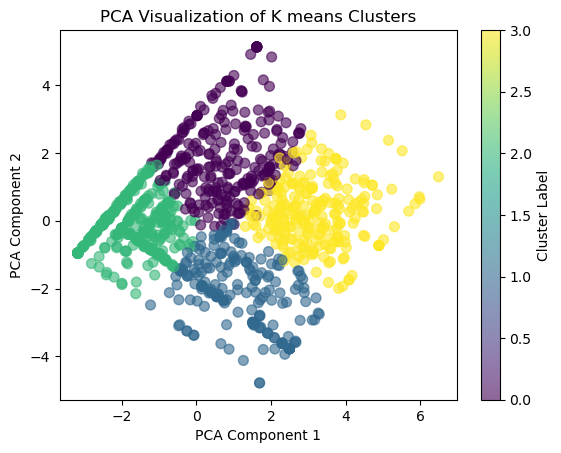

In [23]:
from sklearn.decomposition import PCA

# Reduce data to 2D
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# Plot the 2D PCA result
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of K means Clusters')
plt.colorbar(label='Cluster Label')
plt.show()

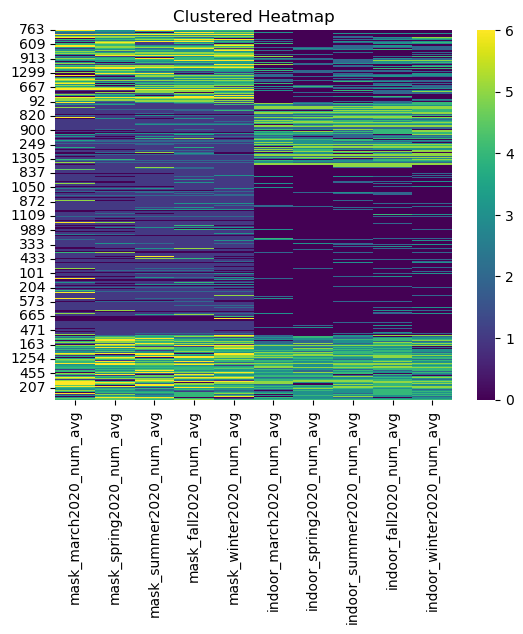

In [24]:
import seaborn as sns


# Sort the DataFrame by cluster labels
df_sorted = df.sort_values(by='k_means_cluster')

# Create a heatmap
sns.heatmap(df_sorted[pattern_col], cmap='viridis')
plt.title('Clustered Heatmap')
plt.show()

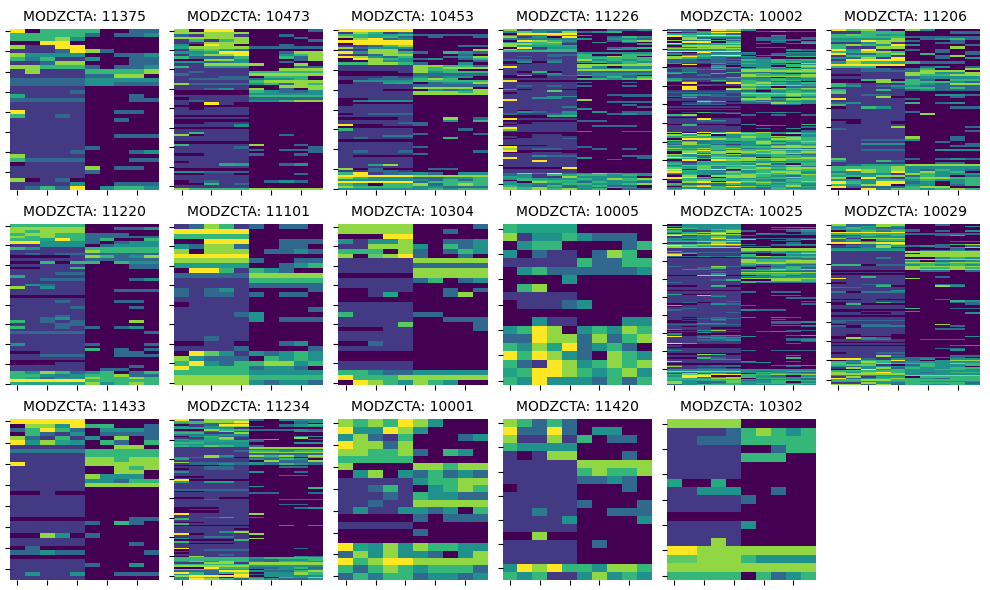

In [38]:
used_mod = np.array([11375, 10473, 10453, 11226, 10002, 11206, 11220, 11101, 10304,
       10005, 10025, 10029, 11433, 11234, 10001, 11420, 10302])

fig, axes = plt.subplots(3, 6, figsize=(10, 6))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten to easily iterate through

# Define the color map you want to use
cmap = 'viridis'

# Iterate over each MODZCTA value and plot in a subplot
for idx, mod_i in enumerate(used_mod):
    # Filter the DataFrame for the current MODZCTA
    df_s = df[df['MODZCTA'] == mod_i]
    # Sort by cluster for better visualization within the heatmap
    df_sorted_i = df_s.sort_values(by='k_means_cluster')
    
    # Plot the heatmap in the current subplot
    sns.heatmap(df_sorted_i[pattern_col], cmap='viridis', ax=axes[idx], cbar=False)
    axes[idx].set_title(f'MODZCTA: {mod_i}', fontsize=10)
    
    # Reduce font size and adjust rotation of x-axis labels
    # axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=45, ha='right', fontsize=6)
    axes[idx].set_yticklabels([])  # Hide y-tick labels for a cleaner look
    axes[idx].set_xticklabels([])
# Remove any empty subplots if `used_mod` has fewer than 18 items
for j in range(len(used_mod), 18):
    fig.delaxes(axes[j])  # Delete empty subplot

# Adjust layout and add color bar
plt.tight_layout()

# Add a single color bar on the right for all subplots
# cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Position for color bar [left, bottom, width, height]
# sns.heatmap(df_sorted_i[pattern_col], cmap='viridis', ax=axes[-1], cbar_ax=cbar_ax)
# cbar_ax.collections[0].colorbar.set_label("Value", rotation=270, labelpad=15)

plt.show()